In [1]:
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
import PIL
import numpy as np
import cv2
import skimage

Задание на практику.

1. Изучить блокнот.
1. Повторить на других изображениях.
1. Найти еще не менее 3х фильтров, которые применяются для работы с изображениями.
1. Применить найденные фильтры.

# Библиотека OpenCV и работа с изображениями

Ссылка на документацию:
https://docs.opencv.org/4.10.0/d9/df8/tutorial_root.html

## Инициализация

Сегодня мы работаем с изображениями. Давайте загрузим несколько. Вы можете загрузить изображения с помощью команды Unix/Windows curl. После загрузки изображения находятся в локальной файловой системе.

Источники изображений:

Place Kitten — Конечно, мы будем использовать изображения кошек! Мы используем базовый URL Place Kitten, за которым следуют ширина и высота, разделенные обратными косыми чертами ''/''. Например, используйте URL https://placekitten.com/500/300, чтобы получить изображение кошки шириной 500 пикселей и высотой 300 пикселей.

Ну и еще изображение Ван Гога из wikimedia в приличном разрешении.


Вы можете использовать любое другое изображение, если хотите.




In [3]:
!curl -o "cat.jpg" "https://placekitten.com/500/300"

!curl -o "gogh.jpg" "https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Vincent_van_Gogh_-_National_Gallery_of_Art.JPG/367px-Vincent_van_Gogh_-_National_Gallery_of_Art.JPG"

!curl -o "leo.jpg" "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTF7Wzr9YSysK_U9ngr0lUZjEQ9rvEA7Tf1NQ&s"

!curl -o "encore.jpg" "https://upload.wikimedia.org/wikipedia/ru/a/a1/Encore_album.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    15  100    15    0     0     27      0 --:--:-- --:--:-- --:--:--    27
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2146  100  2146    0     0   2268      0 --:--:-- --:--:-- --:--:--  2270
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:

## OpenCV

OpenCV — чрезвычайно популярная библиотека компьютерного зрения, написанная на C++, с множеством мощных инструментов для CV. Она позволяет читать, записывать и показывать изображения и видео, читать потоки веб-камеры, находить совпадающие ключевые точки между двумя изображениями и многое другое.

OpenCV написана на C++, однако есть библиотека Python, которая использует эти оптимизированные библиотеки C++ и предоставляет API с использованием массивов numpy!

Давайте импортируем OpenCV

In [4]:
import cv2

Чтение файла:

In [5]:
image = cv2.imread("leo.jpg")

Изображения - это тензор!
PS все, вообще все - или тензор или вектор.

In [6]:
type(image), image.shape, image.dtype

(numpy.ndarray, (221, 228, 3), dtype('uint8'))

## Каналы и форматы изображений
Форма цветного изображения — это (высота, ширина, цвета BGR)
Хотя может показаться странным, что высота идет первой, это потому, что OpenCV обрабатывает изображения как «строки» и «столбцы» изображения. «Высота» изображения — это количество строк!

Цветные изображения состоят из «каналов» — каждый цвет, который мы можем отобразить, представляет собой некоторую комбинацию красного, зеленого и синего (ИЛИ, в случае изображения в оттенках серого, серого).

In [7]:
image.shape

(221, 228, 3)

In [8]:
image[0,0] # Получить значение пикселя, размещенного в точке (0,0) от верхнего левого угла

array([36, 36, 52], dtype=uint8)

## Отображение изображения

Если вы используете скриптовый Python (не Jupyter notebook), команда imshow отобразит изображение. Однако это может вызвать проблемы в Jupyter notebooks.

В Colab вы можете использовать следующую функцию в качестве замены:
from google.colab.patches import cv2_imshow

На моей машине, однако, я также могу отображать изображения с помощью imshow (код ниже). Это остановит выполнение блокнота, пока вы не закроете окно с изображением.

In [9]:
# cv2.imshow('test', image)  #это работает на локальной машине

if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab.patches import cv2_imshow
else:
  print('Not running on CoLab')
  def cv2_imshow(img):
      cv2.imshow('image', img)
      cv2.waitKey(0)
      cv2.destroyAllWindows()


cv2_imshow(image)

Not running on CoLab


## Каналы изображений



In [10]:
c1, c2, c3 = image[:,:,0], image[:,:,1], image[:,:,2]

# отображаем
cv2_imshow(c1)
cv2_imshow(c2)
cv2_imshow(c3)

# или все в одну строку
cv2_imshow( np.concatenate((c1,c2,c3), axis=1) )

In [11]:
empty_arr = np.zeros(c2.shape, dtype=np.uint8)

# Складываем каналы, получаем новый 3 канал
manipulated_image = np.stack([ c1, c1, empty_arr, ], axis=2)
print("Created image of shape",manipulated_image.shape)
cv2_imshow(manipulated_image)

Created image of shape (221, 228, 3)


In [12]:
manipulated_image = np.stack([ c1, empty_arr, c3, ], axis=2)
print("Created image of shape",manipulated_image.shape)
cv2_imshow(manipulated_image)

Created image of shape (221, 228, 3)


In [13]:
import os
# сохраняем изображение

output_path = os.path.join("output.png")
cv2.imwrite(output_path, manipulated_image)

True

In [14]:
# читаем напрямую из файла

test_read_output = cv2.imread(output_path)
print("Read file of shape:",test_read_output.shape, "type",test_read_output.dtype)
cv2_imshow(test_read_output)

Read file of shape: (221, 228, 3) type uint8


## Отображение с Matplotlib

Кроме того, мы можем построить изображение с помощью matplotlib. Это очень полезно, если вы хотите рисовать поверх изображений. OpenCV предоставляет базовые функции, но Matplotlib намного лучше (например, пунктирные линии невозможны с OpenCV).

Поскольку изображения представляют собой массив numpy, это должно быть просто, не так ли?

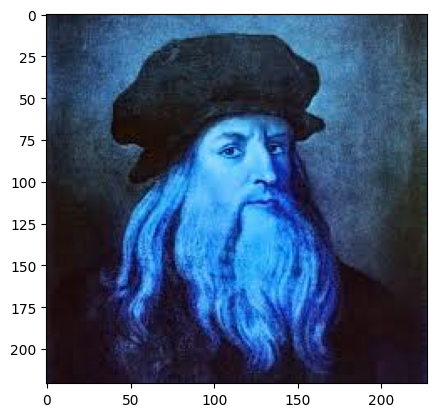

In [15]:
plt.imshow(image)
plt.show()

Цвета не те! Что происходит?

По умолчанию цветные изображения открываются OpenCV как BGR, то есть значения для данного пикселя упорядочены «синий, зеленый, красный».

Мы можем использовать функцию cv2.cvtColor, чтобы изменить цветовую систему нашего изображения.

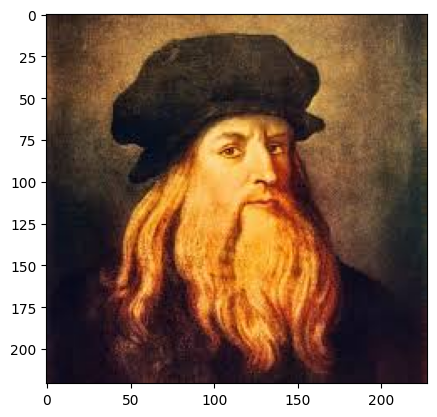

In [16]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

Matplotlib предполагает, что изображения находятся в формате RGB. OpenCV предполагает, что изображения находятся в формате BGR. Поэтому мы преобразуем цвета перед показом изображения. Вот функция для показа изображений OpenCV с помощью matplotlib.

In [17]:
def imshow(image, *args, **kwargs):
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Отрисовываем
    plt.imshow(image, *args, **kwargs)
    # Мы также отключим отображение осей и делений на графике.
    plt.axis('off')
    # Смотрим, что получилось
    plt.show()

## Фильтр Байера

Датчики изображения имеют фильтр Байера на сенсорных элементах (пикселях). Таким образом, каждый второй пиксель в четных строках красный, каждый второй пиксель в нечетных строках синий, и каждый второй пиксель во всех строках содержит зеленый:

_ 0 1

0 R G

1 G B

Давайте создадим необработанное изображение с таким шаблоном Байера из наших загруженных изображений. Мы можем использовать маски и срезы.

(221, 228, 3)


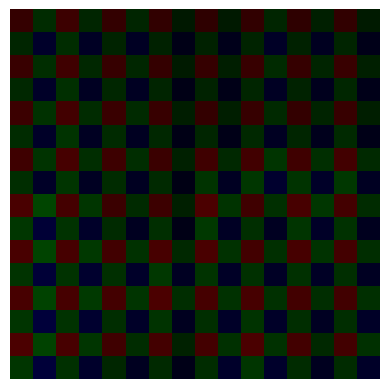

In [18]:
#
print(image.shape)
red_mask = np.zeros(shape=image.shape[0:2],dtype=bool)
green_mask, blue_mask = red_mask.copy(), red_mask.copy()
red_mask[0::2,0::2] = True
blue_mask[1::2,1::2] = True
green_mask[0::2,1::2] = True
green_mask[1::2,0::2] = True

# display red
rsize = np.ceil(np.asarray(red_mask.shape)/2.0).astype(int)
reds = image[:,:,2][red_mask].reshape(rsize)
#cv2_imshow(reds)

# display blue
bsize = np.floor(np.asarray(blue_mask.shape)/2.0).astype(int)
blues = image[:,:,0][blue_mask].reshape(bsize)
#cv2_imshow(blues)

# construct a Bayer image:
bayer = np.zeros(shape=(*image.shape[0:2],3),dtype=image.dtype)
# assing colors (BGR)
bayer[:,:,0][blue_mask]  = blues.flatten() # B
bayer[:,:,2][red_mask]   = reds.flatten() # R
bayer[:,:,1][green_mask] = image[:,:,1][green_mask] # Green
imshow(bayer[:16,:16]) # show zoomed in
cv2_imshow(bayer)

Первый рисунок  показывает, что регистрирует большинство цветных датчиков изображения. Процесс преобразования такого рисунка Байера в цветное изображение называется демозаикой (demosaicing).

## Наивное изменение размера изображения
… просто отбрасывая строки и столбцы. Для этого мы можем использовать нотацию срезов Python.

In [19]:
def downsample( img ):
    return img[0::2,0::2]

half = downsample(image)    # 1/2 resolution
quad = downsample(half)     # 1/4
eighth = downsample(quad)   # 1/8
#imshow(image)
#imshow(half)
#imshow(quad)
#imshow(eighth)

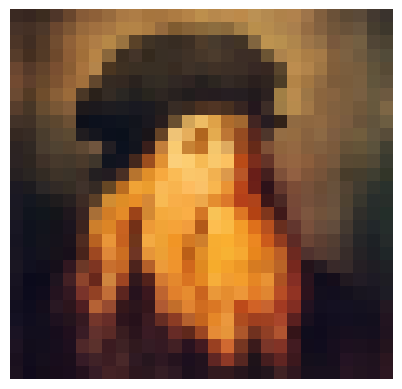

In [20]:
smooth = cv2.resize(image, eighth.shape[1::-1], interpolation=cv2.INTER_AREA)
imshow(smooth)

Отбрасывание пикселей — не лучший способ уменьшения масштаба изображений.

Давайте сравним с уменьшенным изображением с помощью встроенной функции изменения размера OpenCV.

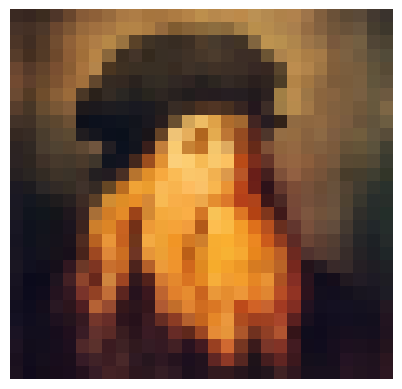

In [21]:
smooth = cv2.resize(image, eighth.shape[1::-1], interpolation=cv2.INTER_AREA)
imshow(smooth)

## Упражнения

***1 упражнение.***

Оттенки серого: Цвет хорош, но монохромные изображения также очень привлекательны. Отображение одного цветового канала выглядит не очень хорошо. Поэтому нам нужна взвешенная сумма всех каналов. Типичные веса для преобразования из RGB в оттенки серого:

0,2989∗R+0,5870∗G+0,1140∗B

(a) Загрузите изображение gogh.jpg. Преобразуйте его в оттенки серого и отобразите. Не забывайте, что каналы — это BGR.


***2 упражнение.***

Гамма-кривая: 8-битные изображения хранятся нелинейно (как наше восприятие).
Обычной функцией, используемой для этого нелинейного линейного отображения, является гамма-кривая: $y=x^\gamma$, где x — линейные значения в диапазоне [0,1]. Гамма равна $\gamma=2.2$ в большинстве систем.

(a) Линеаризуйте изображение и отобразите его. Обратите внимание, что отображение линейного изображения может выглядеть странно.

(b) Примените разные γ (например, 0,5, 1,0 и 1,5) и посмотрите, что происходит.

# 2 упражнение

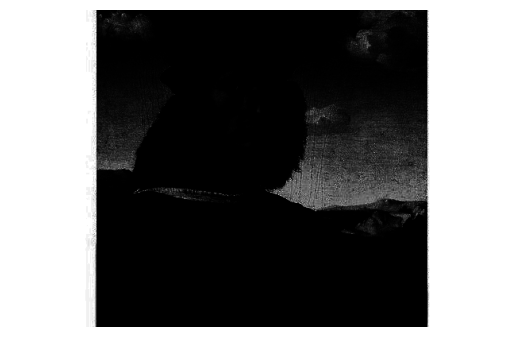

In [22]:
image_r = cv2.imread('raf.jpg')
B, G, R = image_r[:,:,0], image_r[:,:,1], image_r[:,:,2]
gray = np.round(0.2989*R + 0.5870*G + 0.1140*B)/255
gray = gray.astype("float32")

gamma = 15
gray_g = gray ** gamma
imshow(gray_g)

In [23]:
#1 упражнение
!curl -o "raf.jpg" "https://www.alteregohome.ru/media/thumbnails/blog/image/image/mT3yclPJT89k.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 66 48646   66 32399    0     0  37404      0  0:00:01 --:--:--  0:00:01 37455
100 48646  100 48646    0     0  53493      0 --:--:-- --:--:-- --:--:-- 53574


In [24]:
import cv2
import numpy as np

my_photo = cv2.imread('raf.jpg')
img_grey = cv2.cvtColor(my_photo,cv2.COLOR_BGR2GRAY)

#зададим порог
thresh = 100

#получим картинку, обрезанную порогом
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)

#надем контуры
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#создадим пустую картинку
img_contours = np.zeros(my_photo.shape)

#отобразим контуры
cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

cv2.imshow('contours', img_contours) # выводим итоговое изображение в окно

cv2.waitKey()
cv2.destroyAllWindows()


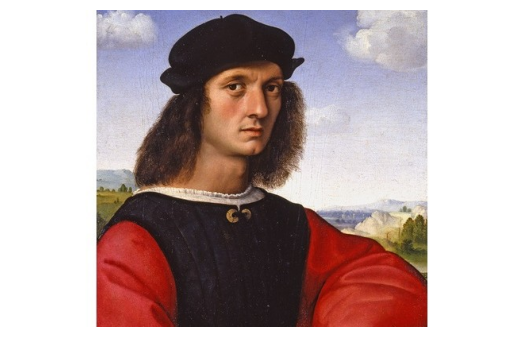

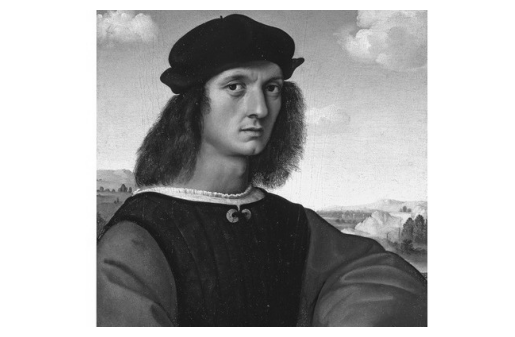

In [25]:
image_r = cv2.imread('raf.jpg')
B, G, R = image_r[:,:,0], image_r[:,:,1], image_r[:,:,2]
gray = np.round(0.2989*R + 0.5870*G + 0.1140*B)
gray = gray.astype("uint8")
imshow(image_r)
imshow(gray)

# Фильтры

Пространственная фильтрация изображения – это метод, при котором каждая точка изображения последовательно обрабатывается с помощью оператора, представленного в виде квадратной матрицы. Результатом работы этого метода является оценка значимости каждого пикселя изображения. Одним из признаков значимости пикселей являются резкие перепады яркости.

Большинство рассмотренных ниже методов основываются на одном из базовых свойств сигнала яркости – разрывности. Наиболее общим способом поиска разрывов является обработка изображения с помощью скользящей маски, называемой также фильтром, ядром, окном или шаблоном, которая представляет собой некую квадратную матрицу, соответствующую указанной группе пикселей исходного изображения. Элементы матрицы принято называть коэффициентами. Оперирование такой матрицей в каких-либо локальных преобразованиях называется фильтрацией или пространственной фильтрацией.

Процесс основан на простом перемещении маски фильтра от точки к точке изображения; в каждой точке $(x,y)$ отклик фильтра вычисляется с использованием предварительно заданных связей. В случае линейной пространственной фильтрации отклик задается суммой произведения коэффициентов фильтра на соответствующие значения пикселей в области, покрытой маской фильтра.

При обнаружении перепадов яркости используются дискретные аналоги производных первого и второго порядка.

### Фильтр Гаусса

Фильтр размытия по гауссу (широко известный ''gaussian blur'' в фотошопе)
достаточно часто применяется сам по себе или как часть других алгоритмов
обработки изображений.

Применение размытия по Гауссу к изображению математически аналогично свёртке
изображения с помощью функции Гаусса. Оно также известно как двумерное
преобразование Вейерштрасса. Поскольку преобразование Фурье функции Гаусса само
является функцией Гаусса, применение размытия по Гауссу приводит к уменьшению
высокочастотных компонентов изображения. Таким образом, размытие по Гауссу
является фильтром нижних частот.


В этом способе размытия функция Гаусса (которая также используется для описания нормального распределения в теории вероятностей) используется для вычисления преобразования, применяемого к каждому пикселю изображения. Формула функции Гаусса в одном измерении:

$${\displaystyle G(x)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {x^{2}}{2\sigma ^{2}}}}}$$

В двух измерениях это произведение двух функций Гаусса, по одной для каждого измерения:

$${\displaystyle G(x,y)={\frac {1}{2\pi \sigma ^{2}}}e^{-{\frac
{x^{2}+y^{2}}{2\sigma ^{2}}}}}$$

где $x$, $y$ — координаты точки, а $\sigma$ — среднеквадратическое отклонение нормального распределения. При применении в двух измерениях эта формула даёт поверхность, контуры которой представляют собой концентрические окружности с нормальным распределением относительно центральной точки.

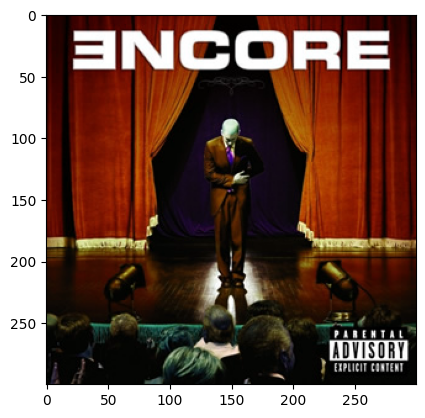

In [29]:
pic = cv2.imread('encore.jpg')
sigma = 10
pix = np.array(pic)
result = ndimage.gaussian_filter(pix, sigma)
PIL_image = PIL.Image.fromarray(np.uint8(result)).convert('L')
plt.imshow(pic)


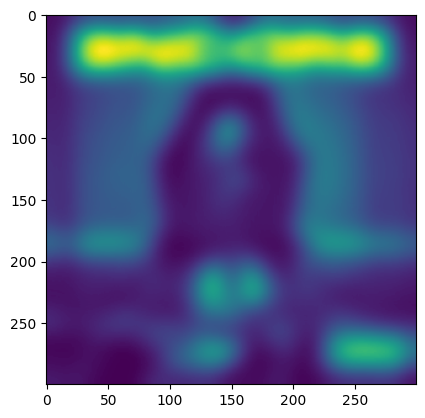

In [30]:
plt.imshow(PIL_image)

### Фильтр Робертса

Перекрёстный оператор Робертса — один из ранних алгоритмов выделения границ, который вычисляет на плоском дискретном изображении сумму квадратов разниц между диагонально смежными пикселами. Это может быть выполнено сверткой изображения с двумя ядрами:
$$\begin{bmatrix}+1&0\\0&-1\\ \end{bmatrix} \text{ и } {\begin{bmatrix}0&+1\\-1&0\\ \end{bmatrix}}$$
Иными словами, величина перепада G получаемого изображения вычисляется из исходных значений параметра Y в дискретных точках растра с координатами
$(x, y)$ по правилу: $${\displaystyle G_{1}=Y_{x,y}-Y_{x+1,y+1}} \text{ ; } {\displaystyle G_{2}=Y_{x+1,y}-Y_{x,y+1}}$$
$${\displaystyle G={\sqrt {G_{1}^{2}+G_{2}^{2}}}}$$

('R', 'G', 'B')
('L',)


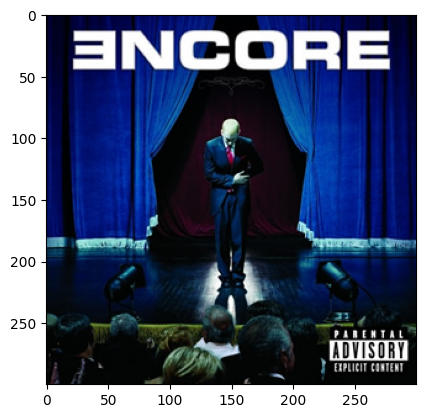

In [33]:
roberts_cross_v = np.array([[1, 0 ],
                            [0,-1 ]])
roberts_cross_h = np.array([[ 0, 1 ],
                            [ -1, 0 ]])
#pix = cv2.imread("1.dicom.jpeg", 0).astype('float64')


with PIL.Image.open('encore.jpg') as pix:
    pix.load()

plt.imshow(pix)
b = pix.getbands()  # проверяем, сколько слоев в изображении
print(b)

# преобразуем в серое
pix = pix.convert("L")

b = pix.getbands()  # проверяем, сколько слоев в изображении
print(b)


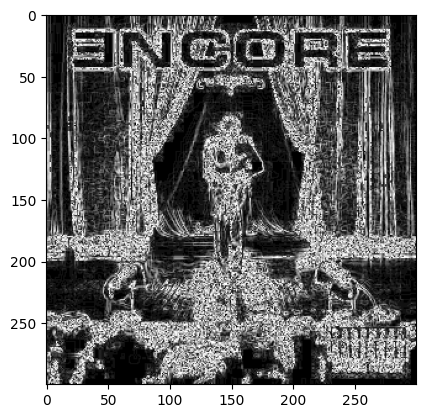

In [34]:
vertical = ndimage.convolve(pix, roberts_cross_v)
horizontal = ndimage.convolve(pix, roberts_cross_h)
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))


PIL_image = PIL.Image.fromarray(np.uint8(edged_img))

plt.imshow(PIL_image,cmap=plt.cm.gray)




### Фильтр Прюитт

Оператор Прюитт используется при обработке изображений, в частности в алгоритмах обнаружения границ. Технически это оператор дискретного дифференцирования, вычисляющий аппроксимацию градиента функции интенсивности изображения. В каждой точке изображения результатом оператора Превитта является либо соответствующий вектор градиента, либо норма этого вектора.

Оператор использует два ядра 3×3, свёртывая исходное изображение для вычисления приближённых значений производных: одно по горизонтали и одно по вертикали. Положим $\mathbf {A}$ исходным изображением, и ${\displaystyle \mathbf {G_{x}} }, {\mathbf  {G_{y}}}$ — двумя изображениями, в которых каждая точка содержит горизонтальное и вертикальное приближение производной, которая рассчитывается как

$$\mathbf {G_{x}} = {\begin{bmatrix}-1&0&+1\\-1&0&+1\\-1&0&+1\end{bmatrix}} * A$$

$$\mathbf {G_{y}} ={\begin{bmatrix}-1&-1&-1\\0&0&0\\+1&+1&+1\end{bmatrix}}*A$$

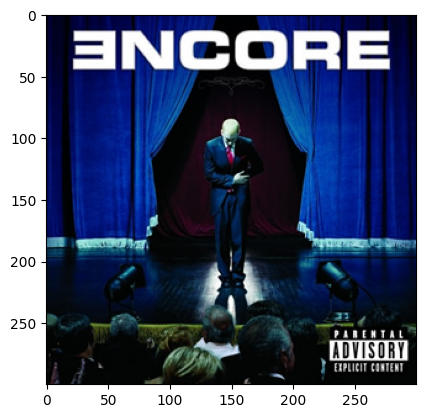

In [37]:
pic = PIL.Image.open('encore.jpg')
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.prewitt(pix)

# первоначальное изображение
plt.imshow(pic, cmap=plt.cm.gray, aspect='equal')

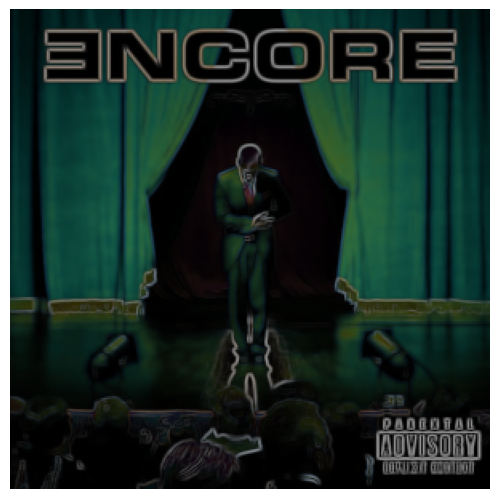

In [38]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

#измененное изображение
plt.imshow(result, cmap=plt.cm.gray, aspect='equal')


plt.savefig("prewitt_test.jpg", dpi=300)

### Фильтр Собеля

Оператор Собеля — дискретный дифференциальный оператор, вычисляющий приближённое значение градиента яркости изображения.

Строго говоря, оператор использует ядра $3 \times 3$, с которыми сворачивают исходное изображение для вычисления приближённых значений производных по горизонтали и по вертикали. Пусть ${\displaystyle \mathbf {A} }$ — это исходное изображение, а ${\displaystyle \mathbf {G} _{x}}$ и ${\displaystyle \mathbf {G} _{y}}$ — два изображения, на которых каждая точка содержит приближённые производные по ${\displaystyle x}$ и по
${\displaystyle y}$. Они вычисляются следующим образом: $$\mathbf {G} _{y} = {\begin{bmatrix}+1&+2&+1\\0&0&0\\-1&-2&-1\\\end{bmatrix}}*\mathbf {A}$$ и $$\mathbf {G} _{x}={\begin{bmatrix}-1&0&+1\\-2&0&+2\\-1&0&+1\end{bmatrix}}*\mathbf {A}$$

$*$ - двумерная операция свертки.

Координата ${\displaystyle x}$ здесь возрастает «направо», а ${\displaystyle y}$ — «вниз». В каждой точке изображения приближённое значение величины градиента можно вычислить путём использования полученных приближенных значений производных: ${\mathbf  {G}}={\sqrt  {{{\mathbf  {G}}_{x}}^{2}+{{\mathbf  {G}}_{y}}^{2}}}$ (имеется в виду поэлементно).
Используя эту информацию, мы можем вычислить искомое направление градиента: ${\mathbf  {\Theta }}=\operatorname {arctan}\left({{\mathbf  {G}}_{y} \over {\mathbf  {G}}_{x}}\right)$,

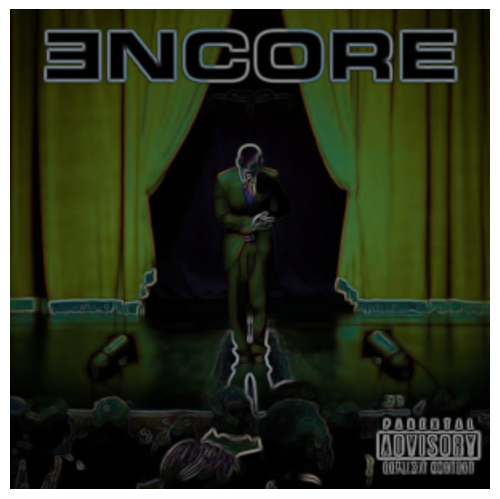

In [40]:
pic = cv2.imread('encore.jpg')
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.sobel(pix)
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(result, cmap=plt.cm.gray, aspect='equal', interpolation="mitchell")
plt.savefig("sobel_test.jpg", dpi=300)

### Фильтр Лапласа

Фильтр Лапласа это очередной фильтр, основанный на принципе нахождения
производных и учитывающий резкие изменения яркости относительно соседних
пикселей.

Однако то, что отличает его от других фильтров, используемых при обработке
изображений для обнаружения границ и выделения признаков, это то, что фильтр
Лапласа "--- это фильтр второго порядка. Когда мы используем производные фильтры
первого порядка, мы должны применять отдельные фильтры для обнаружения
вертикальных и горизонтальных краев (как это было с Прюитт, Собелем и т.д.), а
затем объединять их. Но фильтр Лапласа обнаруживает все края независимо от
направлений.

Математически, фильтр Лапласа определяется как:

$$\Delta^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

Всего существует два вида фильтров Лапласа: положительный и отрицательный.

Положительный оператор Лапласа использует маску, в которой центральный элемент имеет отрицательное значение, а угловые элементы — 0. Этот фильтр идентифицирует внешние края изображения. Пример маски фильтра приведен ниже.

${\begin{bmatrix}0&1&0\\1&-4&1\\0&1&0\\\end{bmatrix}}$

Отрицательный оператор Лапласа используется для поиска внутренних краев изображения. Он использует стандартную маску, в которой центральный элемент имеет положительное значение, углы - $0$, а все остальные элементы - $-1$. Пример приведен ниже.

${\begin{bmatrix}0&-1&0\\-1&4&-1\\0&-1&0\\\end{bmatrix}}$

В обоих случаях сумма значений в фильтре должна быть равна $0$, при этом далеко
необязательно применять конкретные два примера: можно попробовать другие
варианты этих масок.

Пересечение нуля (англ. Zero crossing) — это точка, в которой на графике функции
меняется знак математической функции. При обработке изображений обнаружение края
с использованием фильтра Лапласа происходит путем маркировки точек, которые
приводят к нулю на графике, как потенциальных точек края. Этот метод хорошо
работает на изображениях для поиска краев в обоих направлениях, но плохо
работает, когда на изображении обнаружены шумы. Поэтому обычно изображение
сглаживается, применяя фильтр Гуасса перед фильтром Лапласа. Его часто называют
фильтром Лапласа-Гуасса (LoG).

Мы можем объединить операторы Гаусса и Лапласа вместе, и математическое представление комбинированного фильтра будет следующим:

$$LoG(x, y) = -\frac{1}{\pi \sigma^4} [1 - \frac{x^2 + y^2}{2\sigma^2}] e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

In [43]:
def LoG_filter(image, sigma, size=None):
    # ядро LoG
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(- size // 2 + 1, size // 2 + 1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(- (x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    result = ndimage.convolve(image, kernel)
    return result

image = cv2.imread("encore.jpg", cv2.IMREAD_GRAYSCALE)
sigma = 2.0
filtered_image = LoG_filter(image, sigma)

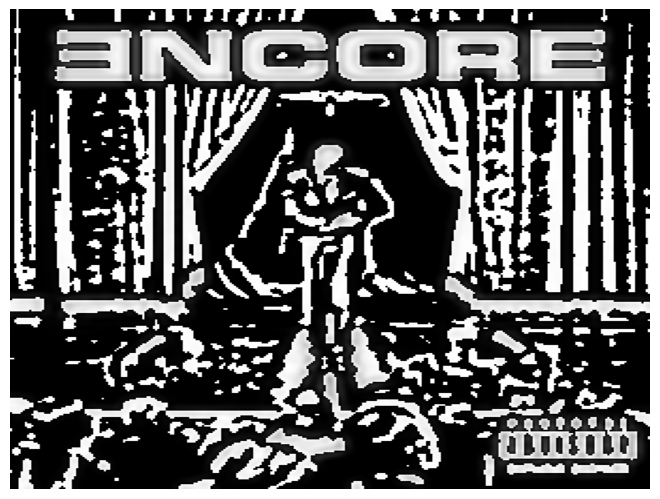

In [44]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(filtered_image, cmap=plt.cm.gray, aspect='auto')
plt.savefig("log_test.jpg", dpi=300)

## Выделение областей

### MeanShift

MeanShift - алгоритм кластеризации на основе центроид, который работает путем
обновления кандидатов на центроиды, чтобы они были средними точками в заданной
области. Затем эти кандидаты фильтруются на этапе постобработки, чтобы исключить
почти дубликаты и сформировать окончательный набор центроид.

Сдвиг среднего значения (англ. MeanShift) является процедурой для определения
местоположения максимумов (мод) плотности вероятности, задаваемой дискретной
выборкой по этой функции. Метод является итеративным, и мы начинаем с начальной
оценки $x$.

Пусть будет задана ядерная функция ${\displaystyle K(x_{i}-x)}$. Эта функция
определяет вес ближайших точек для переоценки среднего. Обычно используется
гауссово ядро от расстояния до текущей оценки ${\displaystyle
K(x_{i}-x)=e^{-c||x_{i}-x||^{2}}}$. Взвешенное среднее плотности в окне,
определённом функцией $K$ равно $${\displaystyle m(x)={\frac {\sum _{x_{i}\in
N(x)}K(x_{i}-x)x_{i}}{\sum _{x_{i}\in N(x)}K(x_{i}-x)}}}$$ где $N(x)$ является
окрестностью точки $x$, то есть набором точек, для которых ${\displaystyle
K(x_{i})\neq 0}$.

In [45]:
from sklearn.cluster import MeanShift, estimate_bandwidth

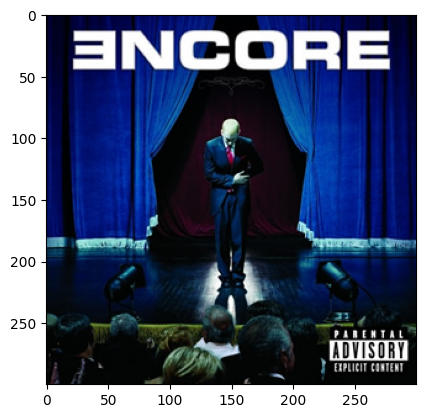

In [47]:
image = PIL.Image.open('encore.jpg').convert('RGB')

plt.imshow(image, cmap=plt.cm.gray, aspect='equal')


img = np.array(image)
shape = img.shape
new_shape = shape[1], shape[0]
reshaped_image = np.reshape(image, [-1, 3])
bandwidth = estimate_bandwidth(reshaped_image, quantile=0.1, n_samples=300)

msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(reshaped_image)

labels = msc.labels_
result_image = np.reshape(labels, shape[:2])

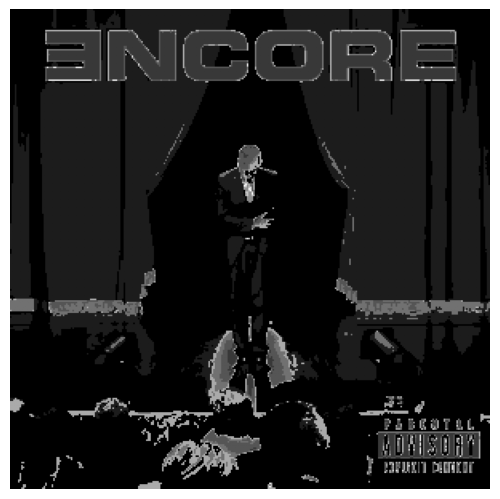

In [48]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.imshow(result_image, cmap=plt.cm.gray, aspect='equal')
plt.savefig("meanshift_test.jpg", dpi=300)

### Floodfill

Алгоритм заполнения позволяет выбирать наборы точек, однородные по цвету. Для
этого необходимо выбрать исходный пиксель и задать интервал изменения цвета
соседних пикселей относительно исходного (определенное пороговое значение
разницы между яркостью соседнего и исходного пикселей, меньше которого соседний
пиксель окрашивается в цвет исходного).

img: изображение, которое нужно залить

mask: mask layer. Используйте маску, чтобы указать область, в которой используется алгоритм. Если он используется для полного изображения, размер маскирующего слоя равен числу строк в исходном изображении + 2 и количеству столбцов + 2.
Размер матрицы 0, край окружности будет установлен в 1 при использовании алгоритма. Только положение, соответствующее 0 на слое маски, может быть залито, поэтому слой маски инициализируется в матрицу 0. [dtype:np.uint8】

seed: это начальная точка алгоритма затопления, которая также основана на оценке пикселей этой точки, чтобы определить, затоплены ли пиксельные точки с похожими цветами.

newvalue: это новое присвоенное значение (B, G, R) для затопленной области

(loDiff1, loDiff2, loDiff3): это значение пикселя, которое можно уменьшить относительно пикселя начальной точки, то есть начального значения (B0, G0, R0), а нижняя граница области затопления равна (B0-loDiff1, G0-loDiff2, R0-loDiff3)

(upDiff1, upDiff2, upDiff3): это значение пикселя, которое может быть направлено вверх относительно начальной точки, то есть начальное значение (B0, G0, R0), верхний предел области затопления равно (B0 + upDiff1, G0 + upDiff2, R0 + upDiff3 )

флаг: режим обработки алгоритма затопления.

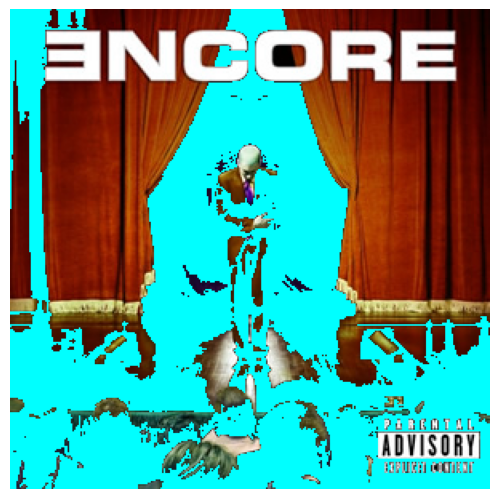

In [49]:
img = cv2.imread('encore.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

copyimg = img.copy()
h, w = copyimg.shape[:2]
mask = np.zeros([h + 2, w + 2], np.uint8)

# нужно задать координаты точек - центров заливки. Без этого работать не будет!

cv2.floodFill(copyimg, mask, (165,60), (0, 255, 255), (50, 20, 50), (50, 50 ,30), cv2.FLOODFILL_FIXED_RANGE)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(copyimg)
plt.savefig("floodfill_test.jpg", dpi=300)

Однако далеко не всегда удается удачно подобрать исходные для заливки пиксели.
Поэтому, чтобы не заниматься выбором исходного пикселя, достаточно применять
преобразование изображения с помощью метода cv2.threshold

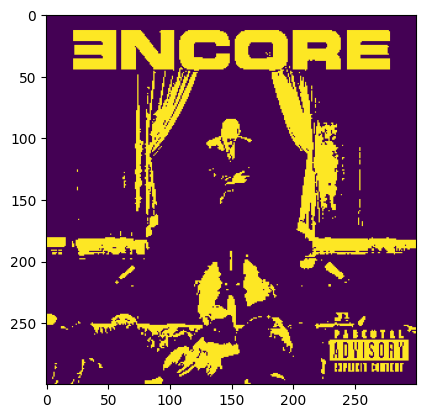

In [50]:
image = cv2.imread("encore.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lower_bound = 50
upper_bound = 50

(thresh, BnW_image) = cv2.threshold(gray_image, lower_bound, upper_bound, cv2.THRESH_BINARY)
im = PIL.Image.fromarray(BnW_image)
im.save("threshold_test.jpg")
plt.imshow(im)

## Зашумление и удаление шумов

Лучший способ добавить шум к данным — это случайно изменить значения точек
данных. Можно выбрать некоторые точки данных в случайных местах и изменить их
значения на случайную величину. При этом можно контролировать количество точек
данных, которые нужно изменить, и степень изменения. Добавление шума к данным и
контроль над ним могут быть достигнуты с помощью нескольких методов добавления
шума:

1. Гауссов шум
2. Импульсный шум.
3. Шум соли и перца
4. Шум квантования


### Гауссов шум

Гауссов шум это по сути просто (опять) распределение Гаусса. Когда он
добавляется к данным, его называют шумом, вызывая искажение данных. Этот шум
широко используется по следующим причинам:

1. Он имеет хорошо изученные свойства и полностью определяется своим средним
   значением и стандартным отклонением, поэтому над ним можно добиться хорошего
   контроля и предсказуемости.

2. Большинство шумов, встречающихся в природе, напоминают гауссов шум, что
делает его идеальным выбором для моделирования.

3. Простота формирования

In [55]:
# здесь представлен пример формирования шума на сером изображении, пример на
# цветном будет ниже

img = cv2.imread('encore.jpg')
img_gray = img[:,:,1]
noise = np.random.normal(0, 50, img_gray.shape)
img_noised = img_gray + noise
img_noised = np.clip(img_noised, 0, 255).astype(np.uint8)

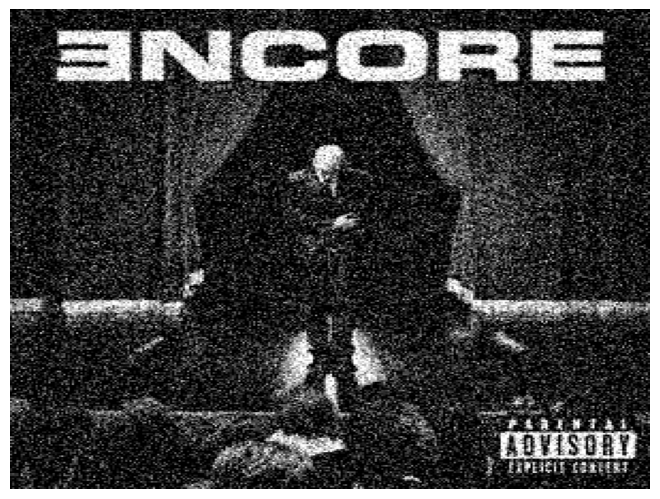

In [56]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray, aspect='auto')
plt.savefig("gauss_noise_test.jpg", dpi=300)

### Импульсный шум

Импульсный шум — это, по сути, внезапное увеличение или уменьшение значений
данных. Добавление такого шума может имитировать реальные данные, которые обычно имеют несколько всплесков в случайных местах. Эти пики также называют выбросами. Вы можете добавить импульсный шум, просто увеличивая или уменьшая значения данных в нескольких случайных местах данных.

In [57]:
x = np.arange(0, 360, 1)
y = np.sin(np.deg2rad(x))

noise_sample = np.random.default_rng().uniform(0.2*min(y), 0.3*max(y), int(0.03*len(y)))
zeros = np.zeros(len(y) - len(noise_sample))
noise = np.concatenate([noise_sample, zeros])
np.random.shuffle(noise)
y_noised = y + noise

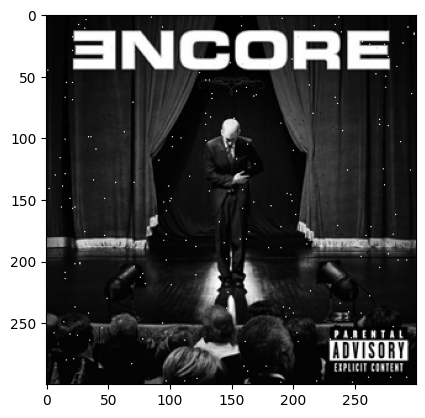

In [58]:
image = cv2.imread("encore.jpg")

h, w = image.shape[:2]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

s = 300  # количество точек - шума

noise_sample = np.random.default_rng().uniform(low=200, high=250, size=s)

rs1 = np.random.randint(0,gray.size/h-1,s)
rs2 = np.random.randint(0,gray.size/w-1,s)

j = 0

# добавляем шум
for i in noise_sample:
    gray[rs2[j]][rs1[j]] += i
    j += 1

plt.imshow(gray, cmap=plt.cm.gray, aspect='equal')

### Шум соли и перца (Salt-and-Pepper)

Шум соли и перца — это тип импульсного шума, в котором случайные точки
данных заменяются минимальными или максимальными значениями данных. Этот тип
шума естественным образом возникает в данных изображения, вызванный
неисправностями датчика или повреждением данных во время хранения или передачи
данных, и, таким образом, этот шум может имитировать отсутствующую или
поврежденную информацию.

In [59]:
img_size = img_gray.size
noise_percentage = 0.1
noise_size = int(noise_percentage*img_size)

random_indices = np.random.choice(img_size, noise_size)
img_noised = img_gray.copy()
noise = np.random.choice([img_gray.min(), img_gray.max()], noise_size)
img_noised.flat[random_indices] = noise

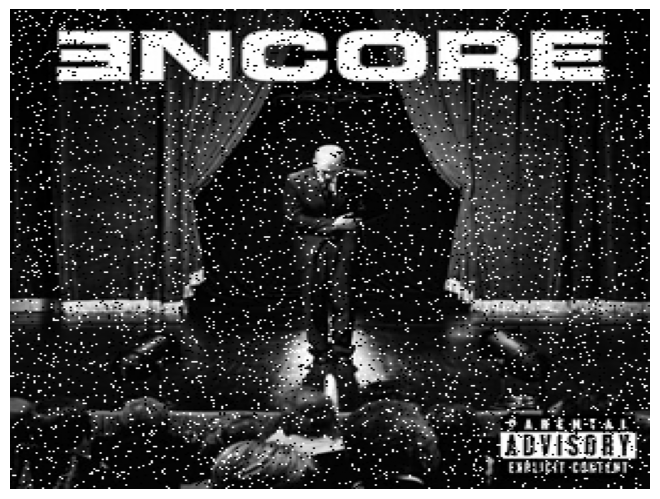

In [60]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray, aspect='auto')
plt.savefig("saltnpepper_test.jpg", dpi=300)

### Шум квантования

Это тип шума, при котором некоторые случайные значения непрерывной переменной представлены дискретными значениями, что приводит к снижению точности этих значений.

Например, рассмотрим следующий набор данных, содержащий непрерывные значения:

$[1.22, 4.35, 6.30, 8.01, 10.44…]$

Когда к этим данным добавляется шум квантования, некоторые из его значений
станут дискретными.

$[1.22, \textit{4}, 6.30, 8.01, \textit{10}, \dots]$

Эти дискретизированные значения представляют собой шум. Один из самых простых
способов добавить этот шум к вашим данным — просто округлить некоторые случайные значения в данных.

In [61]:
# Генерация исходного сигнала-примера
x = np.arange(0, 100, 2)
y = 0.3 * x + 0.6

# Генерация шума
y_size = len(y)
noise_percentage = 0.2
noise_size = int(noise_percentage * y_size)
random_indices = np.random.choice(y_size, noise_size)
y_noised = y.copy()
y_noised[random_indices] = np.rint(y_noised[random_indices])

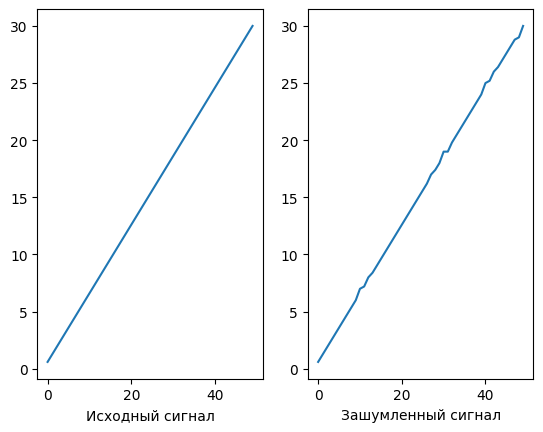

In [62]:
plt.subplot(121)
plt.plot(y)
plt.xlabel("Исходный сигнал")
plt.subplot(122)
plt.plot(y_noised)
plt.xlabel("Зашумленный сигнал")
plt.show()

### Удаление шума из изображения и видео

Существует множество методов сглаживания изображений, таких как размытие по
Гауссу, медианное размытие и т. д. Их иногда принято использовать для удаления
небольшого количества шума. В них берется небольшая окрестность вокруг
зашумленного пикселя и выполняется особая операция (средневзвешенное по Гауссу,
медиана значений и т. д.), чтобы заменить центральный элемент. Таким образом,
удаление шума в пикселе происходит в этих алгоритмах локально по отношению к его
окрестностям.

Также можно использовать параметры шума. Рассмотрим зашумленный пиксель, $p =
p_0 + n$, где $p_0$ — истинное значение пикселя, а $n$ — шум в этом пикселе.
Можно взять большое количество одинаковых пикселей (скажем, $N$) из разных
изображений и вычислить их среднее значение. Тогда в идеале можно получить $p = p_0$,
поскольку среднее значение шума равно нулю.

Библиотека OpenCV обладает четырьмя функциями удаления шума:

* cv.fastNlMeansDenoising() - работает с изображениями в градациях серого
* cv.fastNlMeansDenoisingColored() - работает с цветными изображениями
* cv.fastNlMeansDenoisingMulti() - работает с рядом изображений, полученных за небольшой промежуток времени
* cv.fastNlMeansDenoisingColoredMulti() - то же, что выше, только для цветных изображений

#### cv.fastNlMeansDenoising()

Аргументы:

* h: параметр, определяющий силу фильтра. Более высокое значение h лучше удаляет шум, но также удаляет больше деталей изображения.
* hForColorComponents: то же, что и h, но только для цветных изображений

In [63]:
img = cv2.imread('encore.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 25)

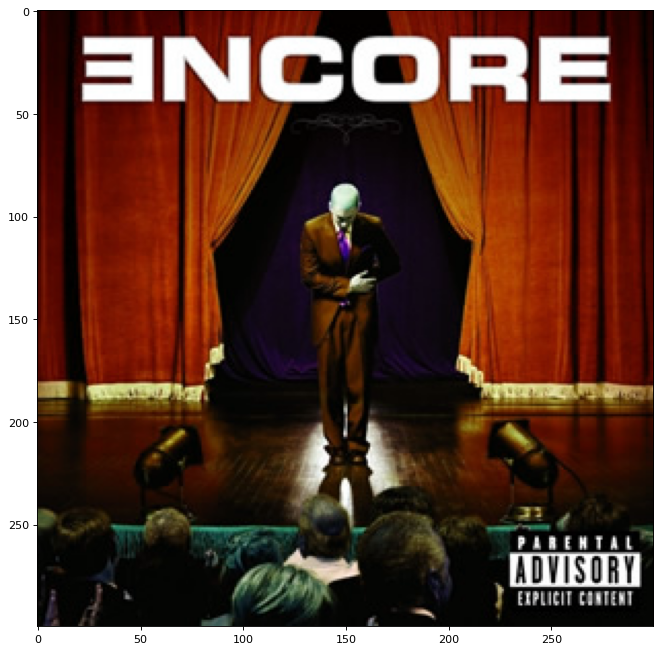

In [64]:
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(img)

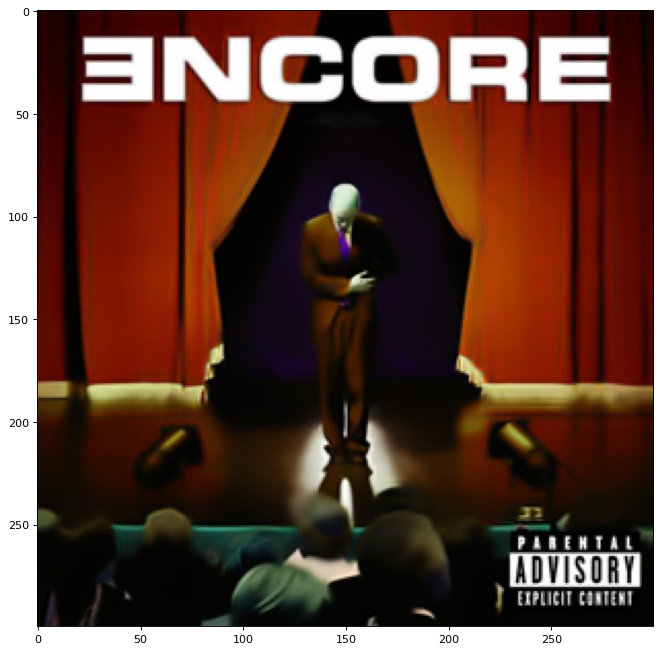

In [65]:
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(dst)

#### cv.fastNlMeansDenoisingColored()

<Figure size 1200x1200 with 0 Axes>

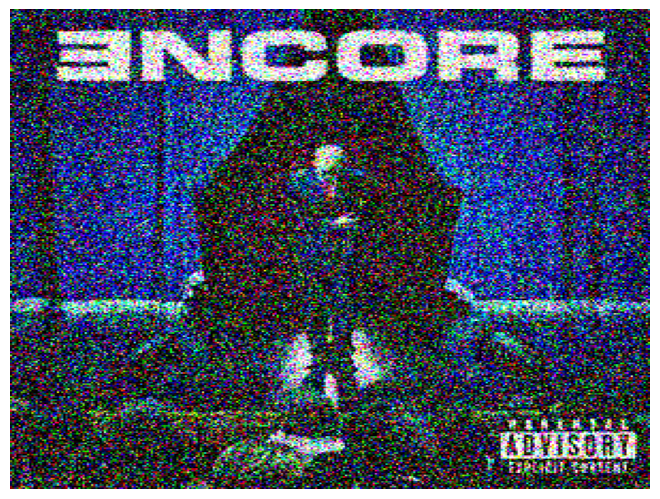

In [67]:
# добавляем шумы и сохраняем

img = cv2.imread("encore.jpg")[...,::-1] / 255.0
noise = np.random.normal(loc=0, scale=1, size=img.shape)
noisy = np.clip((img + noise * 0.2), 0,1)
noisy2 = np.clip((img + noise * 0.4), 0,1)

plt.figure(figsize=(12, 12))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(noisy2, aspect='auto')
plt.savefig("noised_encore.jpg", dpi=300)

In [68]:
img = cv2.imread('noised_encore.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 15, 10, 7, 21)

<Figure size 1200x1200 with 0 Axes>

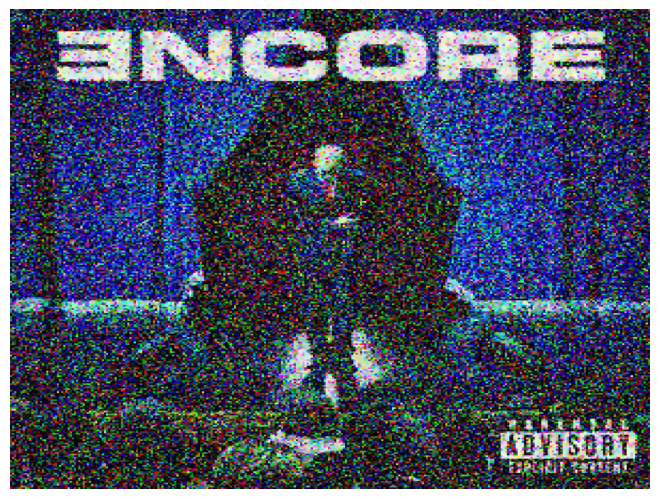

In [69]:
plt.figure(figsize=(12, 12))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(dst[...,::-1] / 255.0, aspect='auto')
plt.savefig("denoised_encore.jpg", dpi=300)

#### cv.fastNlMeansDenoisingColoredMulti()

In [2]:
cap = cv2.VideoCapture('test_vid.mp4')
img = [cap.read()[1] for i in range(5)]

gray = [cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in img]
gray = [np.float64(i) for i in gray]

noise = np.random.randn(*gray[1].shape) * 25
noisy = [i + noise for i in gray]
noisy = [np.uint8(np.clip(i, 0, 255)) for i in noisy]

In [3]:
dst = cv2.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 20, 7, 35)

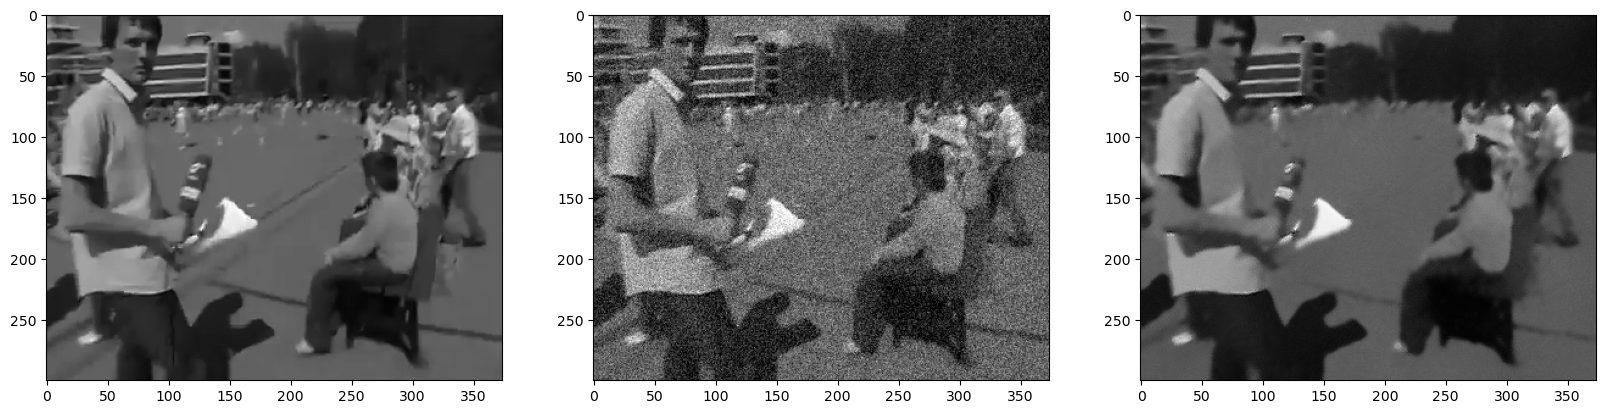

In [4]:
# исходный кадр, зашумленный, с удаленным шумом
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(gray[2],'gray')
plt.subplot(132), plt.imshow(noisy[2],'gray')
plt.subplot(133), plt.imshow(dst,'gray')
plt.show()

### Фильтр для нахождения контура картинки:
Применение: Автомобильные системы (автопилот), робототехника, промышленная автоматизация для идентификации деталей.

In [9]:
import cv2
import numpy as np

my_photo = cv2.imread('encore.jpg')
img_grey = cv2.cvtColor(my_photo,cv2.COLOR_BGR2GRAY)

#зададим порог
thresh = 100

#получим картинку, обрезанную порогом
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)

#надем контуры
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#создадим пустую картинку
img_contours = np.zeros(my_photo.shape)

#отобразим контуры
cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

cv2.imshow('contours', img_contours) # выводим итоговое изображение в окно

cv2.waitKey()
cv2.destroyAllWindows()

### Фильтр для обнаружения прямых линий (Преобразование Хафа):
Преобразование Хафа для обнаружения прямых линий широко используется в автомобильных системах автопилота для распознавания дорожной разметки и удержания полосы движения. В промышленности оно применяется для контроля качества, выявления дефектов и проверки прямолинейности изделий на конвейере.

In [16]:
import sys
import math
import cv2 as cv
import numpy as np
 
 
def main(argv):
    # Loads an image
    src = cv.imread(cv.samples.findFile('encore.jpg'), cv.IMREAD_GRAYSCALE)
    
    dst = cv.Canny(src, 50, 200, None, 3)
 
    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)
 
    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
 
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
    cv.imshow("Source", src)
    cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
    cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)
    
    cv.waitKey()
    return 0
    
 
if __name__ == "__main__":
    main(sys.argv[1:])

### Фильтр для сдвига изображения:
Сдвиг изображения используется для создания панорам и склейки снимков путём совмещения и выравнивания соседних кадров. Он также применяется в стабилизации видео для компенсации дрожания камеры и в системах отслеживания движения объектов между кадрами, например в автофокусе или при анализе траекторий.

In [17]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
 
src = cv.imread('encore.jpg')

srcTri = np.array( [[0, 0], [src.shape[1] - 1, 0], [0, src.shape[0] - 1]] ).astype(np.float32)
dstTri = np.array( [[0, src.shape[1]*0.33], [src.shape[1]*0.85, src.shape[0]*0.25], [src.shape[1]*0.15, src.shape[0]*0.7]] ).astype(np.float32)
 
warp_mat = cv.getAffineTransform(srcTri, dstTri)
 
warp_dst = cv.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]))
 
center = (warp_dst.shape[1]//2, warp_dst.shape[0]//2)
angle = -50
scale = 0.6
 
rot_mat = cv.getRotationMatrix2D( center, angle, scale )
 
warp_rotate_dst = cv.warpAffine(warp_dst, rot_mat, (warp_dst.shape[1], warp_dst.shape[0]))
 
cv.imshow('Source image', src)
cv.imshow('Warp', warp_dst)
cv.imshow('Warp + Rotate', warp_rotate_dst)
 
cv.waitKey()

-1